<div align=center>

# Basic Example of DNN Application - Using Tensorflow

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Notebook Setup


In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras

# For data loading and preprocessing
from keras.datasets import mnist
from keras.utils import to_categorical

# For model creation
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.activations import sigmoid, relu, softmax
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy
from keras.metrics import CategoricalAccuracy

# For model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Loading the MNIST Dataset


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Data Preprocessing


In [3]:
X_train = X_train.reshape((60000, 784)) / 255
X_test = X_test.reshape((10000, 784)) / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

### Data Visualization


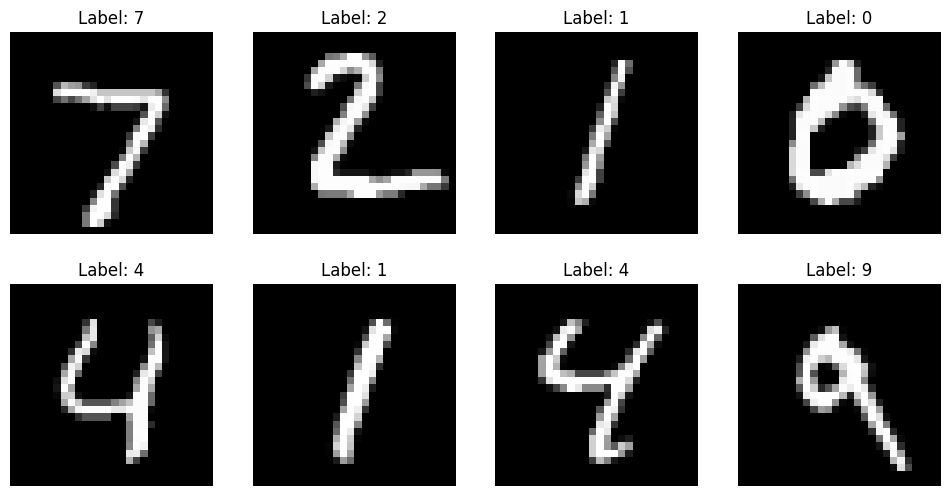

In [4]:
sample_images = X_test[:8, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :].reshape((28, 28)), cmap="gray")
    plt.title(f"Label: {sample_labels[i, :].argmax()}")
    plt.axis("off")

plt.show()

### Creating & Training the DNN Model


In [5]:
model = Sequential()

model.add(Input(shape=(784,)))
model.add(Dense(units=14, activation=sigmoid))
model.add(Dense(units=12, activation=sigmoid))
model.add(Dense(units=10, activation=softmax))

model.compile(
    loss=categorical_crossentropy,
    optimizer=SGD(learning_rate=1.0),
    metrics=[CategoricalAccuracy()],
)

model.summary()

model.fit(
    X_train,
    Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test),
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │        10,990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,300 (44.14 KB)

 Trainable params: 11,300 (44.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.7229 - loss: 0.8573 - val_categorical_accuracy: 0.9200 - val_loss: 0.2792
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - categorical_accuracy: 0.9250 - loss: 0.2573 - val_categorical_accuracy: 0.9346 - val_loss: 0.2227
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 903us/step - categorical_accuracy: 0.9377 - loss: 0.2170 - val_categorical_accuracy: 0.9405 - val_loss: 0.2110
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - categorical_accuracy: 0.9380 - loss: 0.2132 - val_categorical_accuracy: 0.9246 - val_loss: 0.2610
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - categorical_accuracy: 0.9423 - loss: 0.1984 - val_categorical_accuracy: 0.9422 - val_loss: 0.1987
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - categorical_accuracy: 0.9462 - loss: 0.1867 - val_categorical_accuracy: 0.9399 - val_loss: 0.2209
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - categori

### Model Evaluation


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


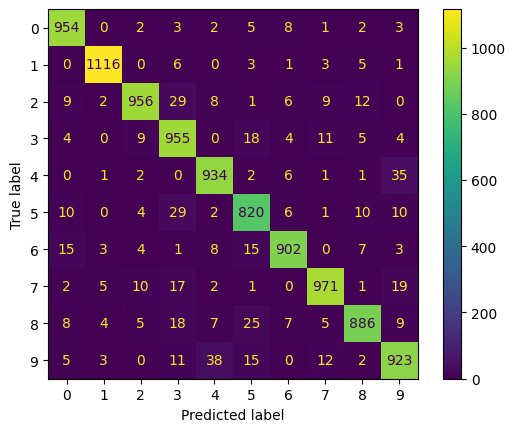

In [7]:
Y_test_hat = model.predict(X_test)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_test_hat.argmax(axis=1, keepdims=True),
    ),
    display_labels=range(10),
).plot()